In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import us

In [3]:
elections = {}

In [4]:
with open("res/president_house_district.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #print(row)
        if (row['CD']) not in elections:
            elections[row['CD']] = {'R':float(row['Trump']),'D':float(row['Clinton']),'I':100-float(row['Trump'])-float(row['Clinton'])}

In [5]:
elections

{'AK-AL': {'D': 37.6, 'I': 9.600000000000001, 'R': 52.8},
 'AL-01': {'D': 34.1, 'I': 2.3999999999999986, 'R': 63.5},
 'AL-02': {'D': 33.0, 'I': 2.0999999999999943, 'R': 64.9},
 'AL-03': {'D': 32.3, 'I': 2.4000000000000057, 'R': 65.3},
 'AL-04': {'D': 17.4, 'I': 2.1999999999999957, 'R': 80.4},
 'AL-05': {'D': 31.3, 'I': 3.9999999999999964, 'R': 64.7},
 'AL-06': {'D': 26.1, 'I': 3.1000000000000014, 'R': 70.8},
 'AL-07': {'D': 69.8, 'I': 1.6000000000000085, 'R': 28.6},
 'AR-01': {'D': 30.2, 'I': 4.800000000000001, 'R': 65.0},
 'AR-02': {'D': 41.7, 'I': 5.899999999999999, 'R': 52.4},
 'AR-03': {'D': 30.5, 'I': 7.600000000000001, 'R': 61.9},
 'AR-04': {'D': 31.3, 'I': 4.4999999999999964, 'R': 64.2},
 'AZ-01': {'D': 46.6, 'I': 5.699999999999996, 'R': 47.7},
 'AZ-02': {'D': 49.6, 'I': 5.699999999999996, 'R': 44.7},
 'AZ-03': {'D': 62.4, 'I': 5.100000000000001, 'R': 32.5},
 'AZ-04': {'D': 27.5, 'I': 4.799999999999997, 'R': 67.7},
 'AZ-05': {'D': 36.5, 'I': 5.899999999999999, 'R': 57.6},
 'AZ-0

In [6]:
len(elections)

435

In [7]:
ea = np.zeros((435, 6))
e17 = {}
e17['KS-04'] = {'R':63505,'D':55310,'I':2082}
#e17['GA-06'] = {'R':98192,'D':94201,'I':176}
e17['GA-06'] = {'R':134595,'D':124893,'I':176}
e17['SC-05'] = {'R':44889,'D':42053,'I':833}
e17['MT-AL'] = {'R':189473,'D':166483,'I':21509}
e17['CA-34'] = {'R':1089,'D':25581,'I':1864}
for e in e17:
    e17[e]['M'] = 100*(e17[e]['D']-e17[e]['R'])/(e17[e]['R']+e17[e]['D']+e17[e]['I'])
el = []
for race in elections:
    #print(elections[race])
    r = [0, 0, 0, 0, 0]
    r[0] = elections[race]['R']
    r[1] = elections[race]['D']
    r[2] = elections[race]['I']
    r[3] = elections[race]['D'] - elections[race]['R']
    if race in e17:
        r[4] = e17[race]['M']#*100/(e17[race]['republican']+e17[race]['democrat']+e17[race]['independent_or_other'])
    #if 300000 not in r:
    el.append(r)
    
print(len(el))
print(np.asarray(el))


435
[[ 70.7  24.5   4.8 -46.2   0. ]
 [ 38.2  56.6   5.2  18.4   0. ]
 [ 35.7  60.1   4.2  24.4   0. ]
 ..., 
 [ 69.3  24.3   6.4 -45.    0. ]
 [ 20.   76.5   3.5  56.5   0. ]
 [ 55.   40.2   4.8 -14.8   0. ]]


In [8]:
comps = []
for race in el:
    #print(race)
    if race[4] != 0:
        comps.append(race)
        
print(np.asarray(comps))

[[ 48.3         46.8          4.9         -1.5         -3.736367  ]
 [ 10.7         83.6          5.7         72.9         85.83444312]
 [ 56.5         35.9          7.6        -20.6         -6.09063092]
 [ 57.3         38.8          3.9        -18.5         -3.23098832]
 [ 60.2         33.           6.8        -27.2         -6.7784974 ]]


In [9]:
from sklearn import linear_model

comps = np.asarray(comps)
print(comps)
print(comps[:,3])
print(comps[:,4])
reg = linear_model.LinearRegression()
reg.fit(comps[:,3].reshape(-1,1), comps[:,4])
print(reg)


x_test = np.asarray(el)
#print(x_test)
y = reg.predict(x_test[:,3].reshape(-1,1))

results = np.c_[x_test[:,:4], y]
print(results)
print(sum(results[:,4]))

[[ 48.3         46.8          4.9         -1.5         -3.736367  ]
 [ 10.7         83.6          5.7         72.9         85.83444312]
 [ 56.5         35.9          7.6        -20.6         -6.09063092]
 [ 57.3         38.8          3.9        -18.5         -3.23098832]
 [ 60.2         33.           6.8        -27.2         -6.7784974 ]]
[ -1.5  72.9 -20.6 -18.5 -27.2]
[ -3.736367    85.83444312  -6.09063092  -3.23098832  -6.7784974 ]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[[ 70.7         24.5          4.8        -46.2        -32.27041147]
 [ 38.2         56.6          5.2         18.4         29.93548047]
 [ 35.7         60.1          4.2         24.4         35.71311749]
 ..., 
 [ 69.3         24.3          6.4        -45.         -31.11488406]
 [ 20.          76.5          3.5         56.5         66.62347556]
 [ 55.          40.2          4.8        -14.8         -2.03411105]]
6670.67392021


In [10]:
#print(results)
changes = 0
old = 0
wins = 0
for r in results:
    changes += r[3]/435
    old += r[4]/435
    #print(r[3]/r[4])
    if r[4] > 0:
        wins += 1
print(changes)
print(old)
print(wins*100/435)

3.23747126437
15.3348825752
62.06896551724138


In [11]:
specialData = []
dnames = []
with open("res/SpecialModelData.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #print(row)
        if (row['District']) not in specialData and len(row['Clinton']) > 0:
            dnames.append(row['District'])
            entry = [row['Insured'], row['Income'], row['Poverty'], row['Bach'], row['Wbach'], row['Gini'], row['NoComp'], row['PresMargin'], row['Special']]
            newent = [100 - float(row['Clinton']) - float(row['Trump'])]
            for ent in entry:
                #print(ent)
                if ent == '':
                    newent.append(-3000)
                else:
                    newent.append(float(ent))
            newent[-1] -= newent[-2]
            specialData.append(newent)
            print(newent)

[2.4000000000000057, 85.8, 44309.0, 18.3, 15.2, 26.2, 0.4693, 22.7, -29.4, -2970.6]
[2.0999999999999943, 87.5, 42645.0, 19.5, 13.5, 24.1, 0.4618, 19.8, -31.9, -2968.1]
[2.4000000000000057, 88.2, 41695.0, 20.4, 12.5, 22.3, 0.4689, 19.1, -33.0, -2967.0]
[2.1999999999999886, 86.4, 39147.0, 19.2, 9.7, 16.5, 0.4586, 20.5, -63.0, -2937.0]
[4.0, 87.4, 50392.0, 15.1, 18.8, 31.3, 0.4692, 14.7, -33.4, -2966.6]
[3.1000000000000085, 90.5, 59659.0, 11.0, 21.4, 36.3, 0.4599, 13.0, -44.7, -2955.3]
[1.6000000000000014, 85.4, 32245.0, 28.8, 12.0, 26.9, 0.4943, 24.9, 41.2, -3041.2]
[9.600000000000001, 81.8, 72515.0, 10.2, 17.9, 33.6, 0.4181, 7.6, -15.2, -2984.8]
[5.699999999999996, 84.4, 47531.0, 21.9, 14.3, 32.6, 0.4595, 18.4, -1.1, -2998.9]
[5.699999999999996, 88.6, 47507.0, 16.3, 18.8, 37.6, 0.4697, 10.8, 4.9, -3004.9]
[5.100000000000001, 80.5, 41293.0, 24.5, 10.1, 25.2, 0.4409, 14.2, 29.9, -3029.9]
[4.799999999999997, 86.8, 44345.0, 16.4, 11.7, 19.6, 0.429, 14.3, -40.2, -2959.8]
[5.899999999999999, 

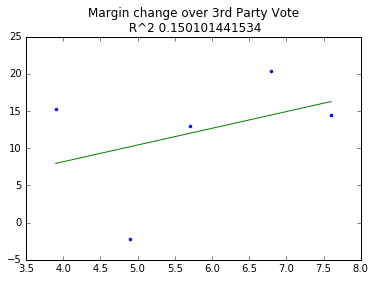

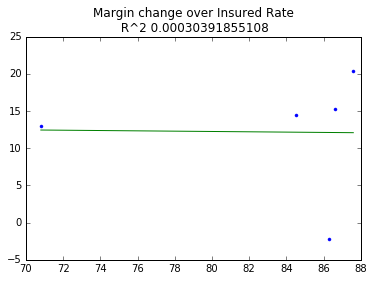

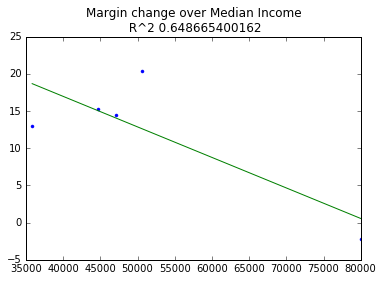

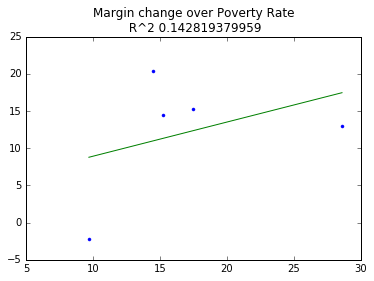

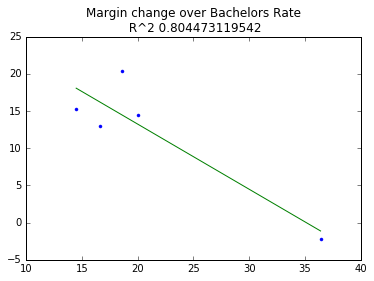

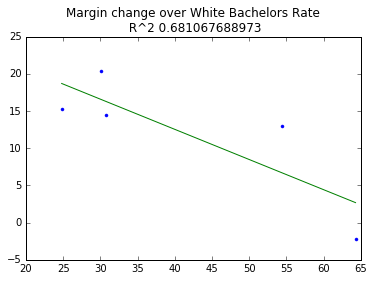

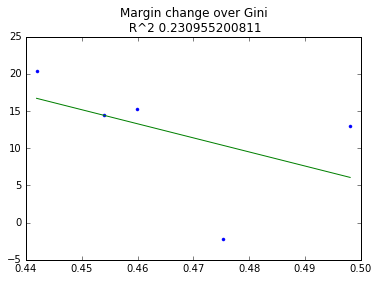

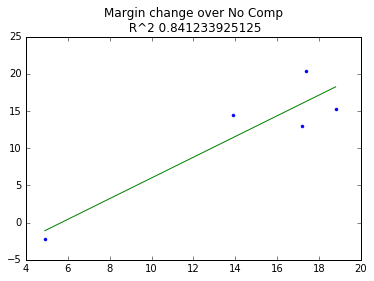

In [12]:
sd = specialData

done17 = []
for row in sd:
    #print(row[-1])
    if row[-1] > -2000:
        done17.append(row)

#print(done17)
done17 = np.asarray(done17)

from scipy.stats import linregress

for i, n in enumerate(["3rd Party Vote", "Insured Rate", "Median Income", "Poverty Rate", "Bachelors Rate", "White Bachelors Rate", "Gini", "No Comp"]):
    #print(i)
    x = done17[:,i]
    y = done17[:,-1]
    lin = linregress(x, y)
    #print(lin)
    plt.plot(x, y, '.')
    plt.plot(np.sort(x), lin.slope*np.sort(x)+lin.intercept, '-')
    plt.title("Margin change over " + n + "\n R^2 " + str(lin.rvalue**2))
    #plt.subtitle
    plt.show()
    
    

[[  3.58360000e+04   1.66000000e+01   5.44000000e+01   1.29300000e+01]
 [  7.99970000e+04   3.64000000e+01   6.43000000e+01  -2.24000000e+00]
 [  5.06440000e+04   1.86000000e+01   3.01000000e+01   2.04300000e+01]
 [  4.71690000e+04   2.00000000e+01   3.08000000e+01   1.45100000e+01]
 [  4.46850000e+04   1.45000000e+01   2.48000000e+01   1.52700000e+01]]
435


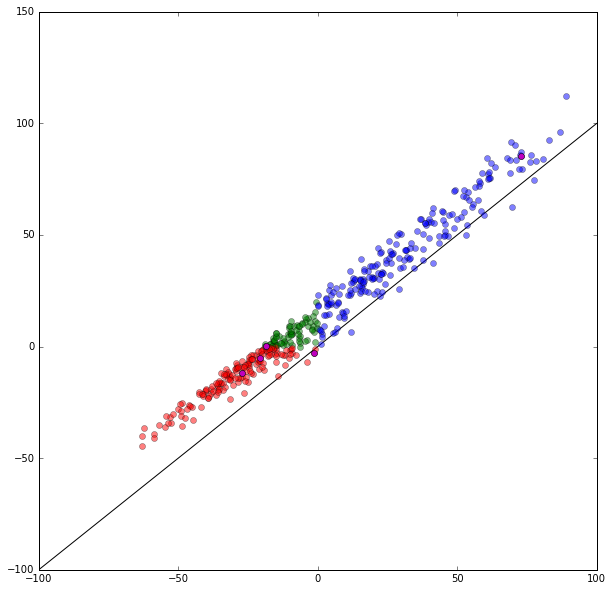

275
0.632183908045977
7.99039409174


In [26]:
sd = specialData
#print(sd)

train = []
for row in sd:
    #print(row[-1])
    if row[-1] > -2000:
        train.append(row) 
#print(train)

train = np.asarray(train)
#train = train[:,[2,3,4,5,6,9]]

mask = [2, 4, 5]

model = linear_model.LinearRegression()
model.fit(train[:,mask],train[:,-1])
print(train[:, mask + [-1]])
#print(dir(model))

test = []
for row in sd:
    if row[0] > -2000:
        test.append(row)
#print(len(test))
print(len(test))
test = np.asarray(test)

pred = model.predict(test[:,mask])
#print(pred)
#print(sum(pred)/430)

win = 0
winsum = 0
for i, p in enumerate(pred):
    if test[i,-2] + p > 0:
        win += 1
        winsum += p/435
        
e18 = [t + pred[i] for i, t in enumerate(test[:,-2])]
#print(e18)
#plt.plot(test[:,-2], e18, '.')
plt.figure(figsize=(10,10))
plt.plot([-100, 100],[-100,100],c='k')
for i, (e, t) in enumerate(zip(e18, test[:,-2])):
    col = 'b'
    style = 'o'
    if e > 0:
        if t < 0:
            col = 'g'
    else:
        if t < 0:
            col = 'r'
        else:
            col = 'k'
    plt.plot(t, e, style, c=col, alpha=0.5)
for i, (e, t) in enumerate(zip(e18, test[:,-2])):
    if sd[i][-1] > -2000:
        col = 'm'
        style='o'
        plt.plot(t, e, style, c=col)
    if e < 0 and t > 0:
        print(dnames[i])
plt.show()
print(win)
print(win/435)
print(winsum)